# Data analysis of taxi data in New York: searching for patterns using visualizations.

In [7]:
#conda install matplotlib

In [8]:
#conda install sklearn

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

## The dataset Taxis

The dataset contains taxi trips in New York City in 2019. Detailed description is available on the  [website](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

The columns in the dataset are:

- `pickup` - start time of the trip
- `dropoff` - end time of the trip
- `passengers` - number of passengers in the trip
- `distance` - distance of the trip
- `fare` - base fare for the trip
- `tip`- tip amount
- `tolls` - toll amount (paid by the passenger)
- `payment`- payment method
- `pickup_zone` - zone where the trip started
- `dropoff_zone` - zone where the trip ended
- `pickup_borough` - borough where the trip started
- `dropoff_borough` - borough where the trip ended


First, let's load the data.

In [6]:
df_taxi = sns.load_dataset('taxis')

1.Let's output:
 - The first 3 records from the dataset
 - Data types in the dataset df_taxi
 - Dimensions of the dataset

The first 3 records from the dataset:

In [7]:
 display(df_taxi.head(3))

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


Data types in the dataset df_taxi:

In [8]:
df_taxi.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

Dimensions of the dataset:

In [9]:
df_taxi.shape

(6433, 14)

2.Let's check if there are any missing values in this dataset.

In [10]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

I wonder why the data is missing?
Answering this question will give us an understanding of whether we can delete such data or if it's necessary to somehow fill them in.
Let's display on the screen those rows where the column with the most missing values (or one of those with the maximum number of missing values) has missing values.


In [11]:
max_missing_column = df_taxi.isna().sum().idxmax()

In [12]:
rows_with_missing = df_taxi[df_taxi[max_missing_column].isnull()]
display(rows_with_missing)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


Conclusion: There could be several reasons for the absence of data:

 - Perhaps for some technical reason, they were not saved or were not filled in.
 - Data may be missing, for example, in the case of trip cancellation. If the trip was canceled before its start.
 - I assume that values where distance == 0 and total != 0 exist because we considered missing values as NA, and since the data type for distance and total is float64, then the missing values here would be of another type, for example, 0.00, and it is these values that need to be filtered out.

3.Let's fill in the empty values. Since all columns in the dataset have missing values in rows with string data type, let's fill in the missing values with the string 'NA'.
We will create a dataset called df_taxi_clean, which contains the data from df_taxi with missing values filled in all columns (where those values are missing) with the value 'NA'.

We will use df_taxi_clean in further work.

In [13]:
df_taxi_clean = df_taxi.fillna('NA')

Let's check how the empty values have been filled in:

In [14]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

4. Let's look at the data dynamically. We will transform the `pickup` column of the dataset `df_taxi_clean` into the format `datetime64[ns]`.

We will save the result of the transformation in the same `pickup` column.

In [15]:
df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])

In [16]:
print(df_taxi_clean['pickup'].dtype)

datetime64[ns]


Let's check the result

In [17]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

5.We currently have the `pickup` column containing data in datetime format. Let's remove the time and analyze the data by day.

In [18]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

Now let's group the data by pickup_day and plot the total payments by day.

In [19]:
payments_by_day = df_taxi_clean.groupby('pickup_day')['total'].sum()

In [20]:
payments_by_day #checking how the code in the previous cell works

pickup_day
2019-02-28       6.30
2019-03-01    4213.83
2019-03-02    3319.02
2019-03-03    3027.32
2019-03-04    3269.08
2019-03-05    4377.38
2019-03-06    4673.61
2019-03-07    4115.70
2019-03-08    4524.21
2019-03-09    3785.80
2019-03-10    3198.69
2019-03-11    4021.26
2019-03-12    3875.80
2019-03-13    4868.06
2019-03-14    4742.55
2019-03-15    4030.29
2019-03-16    3836.58
2019-03-17    3469.50
2019-03-18    3258.78
2019-03-19    3963.92
2019-03-20    4522.95
2019-03-21    4355.08
2019-03-22    4245.36
2019-03-23    3355.98
2019-03-24    2616.81
2019-03-25    2877.55
2019-03-26    3366.20
2019-03-27    4417.17
2019-03-28    3886.44
2019-03-29    3790.52
2019-03-30    4004.39
2019-03-31    3108.84
Name: total, dtype: float64

<Axes: xlabel='pickup_day'>

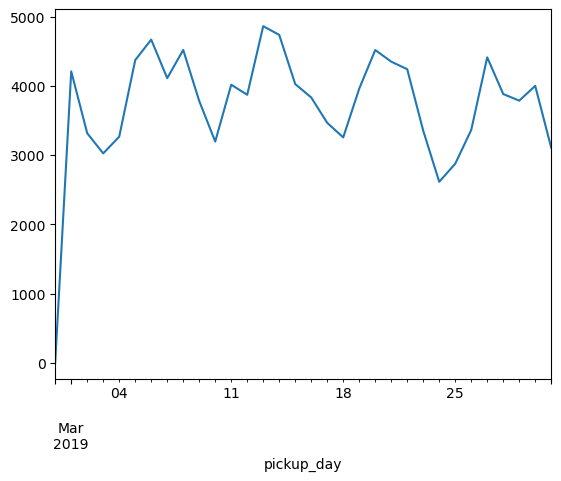

In [21]:
payments_by_day.plot(x = 'pickup_day', y = 'payments_by_day')

We see a significant spike in data at the beginning of the plot.

6.Let's output the number of rows for each pickup_day.

In [22]:
rows_size = (df_taxi_clean.groupby('pickup_day').size())
display (rows_size)

pickup_day
2019-02-28      1
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    185
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    233
2019-03-21    221
2019-03-22    229
2019-03-23    209
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
dtype: int64

For the date 2019-02-28, there is only one row. This record seems to have ended up here accidentally. Let's delete the row from the dataset df_taxi_clean that contains pickup_day equal to 2019-02-28. Then let's plot the total payments by pickup_day again.

In [23]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_day'] != '2019-02-28']

In [24]:
payments_by_day_new = df_taxi_clean.groupby('pickup_day')['total'].sum()
payments_by_day_new

pickup_day
2019-03-01    4213.83
2019-03-02    3319.02
2019-03-03    3027.32
2019-03-04    3269.08
2019-03-05    4377.38
2019-03-06    4673.61
2019-03-07    4115.70
2019-03-08    4524.21
2019-03-09    3785.80
2019-03-10    3198.69
2019-03-11    4021.26
2019-03-12    3875.80
2019-03-13    4868.06
2019-03-14    4742.55
2019-03-15    4030.29
2019-03-16    3836.58
2019-03-17    3469.50
2019-03-18    3258.78
2019-03-19    3963.92
2019-03-20    4522.95
2019-03-21    4355.08
2019-03-22    4245.36
2019-03-23    3355.98
2019-03-24    2616.81
2019-03-25    2877.55
2019-03-26    3366.20
2019-03-27    4417.17
2019-03-28    3886.44
2019-03-29    3790.52
2019-03-30    4004.39
2019-03-31    3108.84
Name: total, dtype: float64

Plot

<Axes: xlabel='pickup_day'>

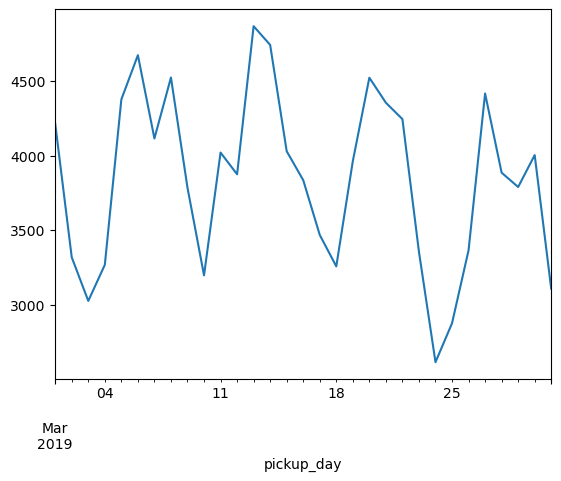

In [25]:
payments_by_day_new.plot(x = 'pickup_day', y = 'payments_by_day')

7.Next, let's look at the dynamics of total payments by boroughs. To do this, we will create a pivot table based on `df_taxi_clean`, where the rows will represent `pickup_day`, the columns will represent `pickup_borough`, and the values will be the sum of payments. We will store this pivot table in a variable called `borough_pivot`. Finally, we will remove the column with `pickup_borough` equal to `NA`.

In [26]:
borough_pivot = df_taxi_clean.pivot_table(index = ['pickup_day'], columns = ['pickup_borough'], values = ['total'], aggfunc='sum') 

In [27]:
borough_pivot

total                                   
pickup_borough   Bronx Brooklyn Manhattan      NA  Queens
pickup_day                                               
2019-03-01      123.42   353.05   3169.47   14.60  553.29
2019-03-02         NaN   146.56   2716.33     NaN  456.13
2019-03-03       80.75   407.06   2100.23   10.55  428.73
2019-03-04       92.00   188.73   2026.17     NaN  962.18
2019-03-05       98.16   558.40   2981.26     NaN  739.56
2019-03-06      130.65   198.53   3501.07   10.00  833.36
2019-03-07         NaN   440.75   3087.82     NaN  587.13
2019-03-08       79.20   237.47   3408.85   18.35  780.34
2019-03-09       80.22   187.88   2967.71   38.26  511.73
2019-03-10      119.86   160.48   2353.45   70.26  494.64
2019-03-11       46.04   254.92   3019.49    3.30  697.51
2019-03-12       31.83   158.74   2896.13  166.00  623.10
2019-03-13       42.44   287.68   3690.66   10.00  837.28
2019-03-14       82.53   255.84   3609.49     NaN  794.69
2019-03-15       94.32   336.91   3051.71   30.36  516.99
2019-03-16       34.80   334.22   2763.89     NaN  703.67
2019-03-17       64.63   166.92   2430.99     NaN  806.96
2019-03-18       23.10   132.07   2393.46   12.36  697.79
2019-03-19      166.28    97.11   2713.03  215.77  771.73
2019-03-20      104.88   100.42   3399.59     NaN  918.06
2019-03-21       32.56   253.08   3428.19    8.76  632.49
2019-03-22       35.53   328.07   3138.56     NaN  743.20
2019-03-23      147.63   192.90   2605.58   55.80  354.07
2019-03-24        7.30   180.04   1773.76   25.10  630.61
2019-03-25      142.47   149.27   1976.89     NaN  608.92
2019-03-26       21.80   173.45   2371.88     NaN  799.07
2019-03-27      183.29   127.77   3300.23     NaN  805.88
2019-03-28       72.53   236.75   2763.48     NaN  813.68
2019-03-29       63.18   115.97   2953.97   79.16  578.24
2019-03-30        3.80   359.74   2885.42  114.18  641.25
2019-03-31       48.56   246.70   2341.47     NaN  472.11

We see that we have a multi-index for the "total" column. Let's remove it.

In [28]:
borough_pivot.columns = borough_pivot.columns.droplevel(0)

In [29]:
borough_pivot.drop(columns=('NA'), inplace=True)

In [30]:
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,NaN,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


Let's cteate a plot 

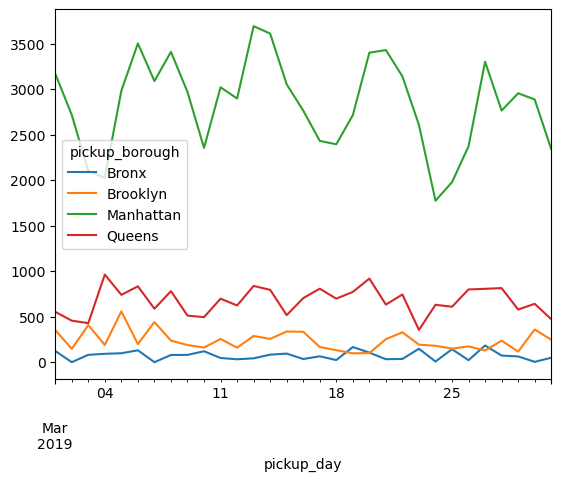

In [31]:
borough_pivot.fillna(0).plot();

8.Let's display histograms of the daily payment sums for trips in each of the boroughs.

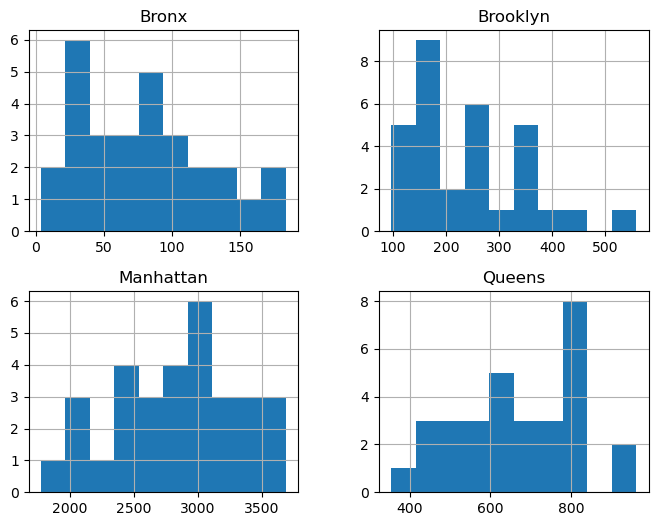

In [32]:
borough_pivot.hist(figsize = (8,6));

9.We see that in some histograms, we have different ranges of fares. Let's compare the distributions of daily payment sums by boroughs. To do this, let's display 4 histograms on one figure.

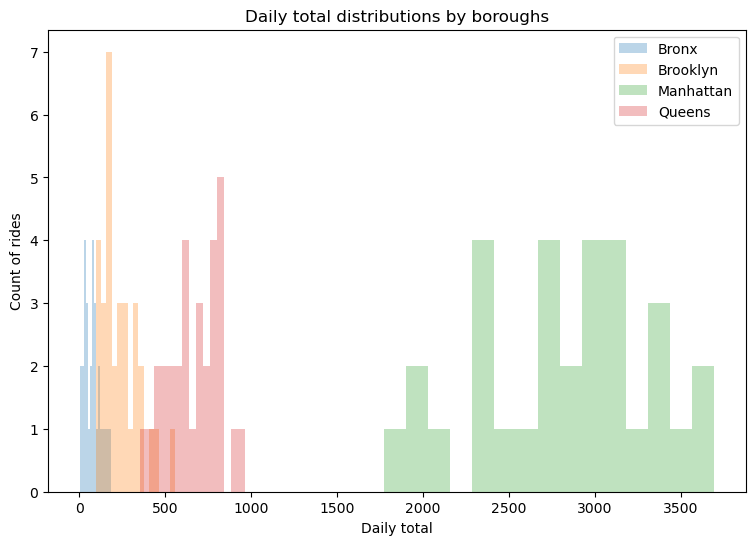

In [33]:
plt.figure(figsize=(9,6))
for col in borough_pivot.columns:
    plt.hist(borough_pivot[col], bins=15, alpha=0.3, label=col)
plt.xlabel('Daily total') 
plt.ylabel('Count of rides') 
plt.title('Daily total distributions by boroughs')
plt.legend()
plt.show();

10.Using seaborn, let's display histograms of the monthly payment sums by car colors (column `color`). There should be as many histograms on one figure as there are different car colors in the dataset.

In [41]:
df_taxi_clean_sorted = df_taxi_clean.sort_values(by='color')

<Axes: xlabel='total', ylabel='Count'>

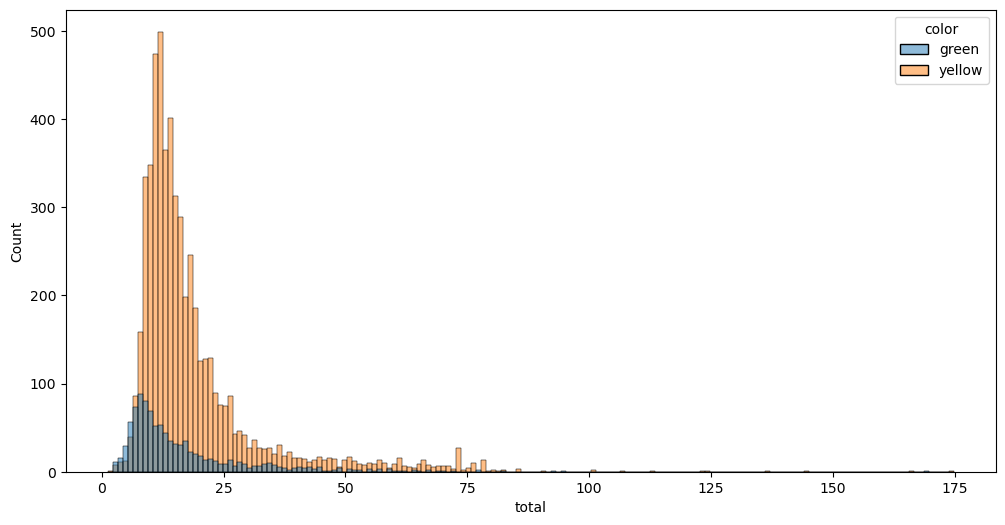

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_taxi_clean_sorted, x='total', hue='color')

11.Is there a relationship between trip distance and tip amount? 
Let's plot a scatter plot between trip distance and tip amount. 

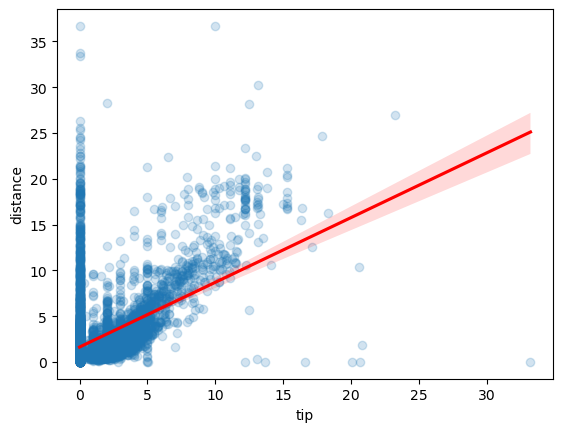

In [43]:
sns.regplot(x='tip', y='distance', data=df_taxi_clean, scatter_kws={'alpha': 0.2}, line_kws={"color": "red"})
plt.show()

A straight line of points parallel to the y-axis indicates that there were trips without tips.

13. Let's analyze the daily dynamics of tips by the boroughs where passengers were picked up.


Based on the graphic we can answer such questions:

1) At the beginning of the trip, which borough has the lowest average tip amount?
  - The Bronx has the lowest average tip amount.

2) And in trips from which borough is the average tip amount the highest?
   - Queens has the highest average tip amount.

3) Which borough has the most stable tip amount for trips from it?
   - For trips from Manhattan, the tip amount is the most stable from day to day.

In [46]:
df_taxi_clean_2=df_taxi_clean[df_taxi_clean.pickup_borough!='NA']

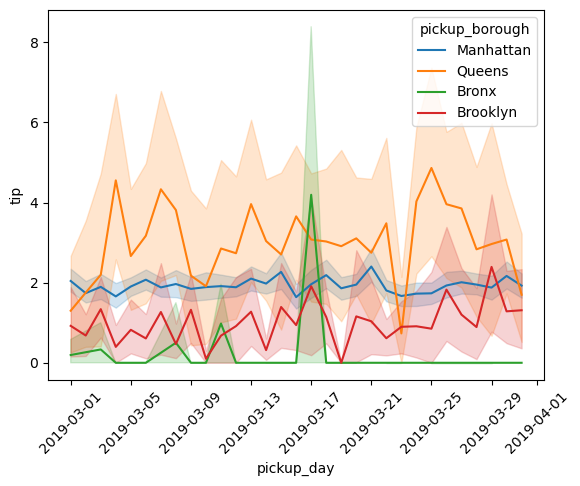

In [47]:
sns.lineplot(data=df_taxi_clean_2, x='pickup_day', y='tip', hue='pickup_borough')
plt.xticks(rotation=45) 
plt.show()

14.Let's build a box plot of the tip amount by the pickup borough (all boroughs except 'NA').

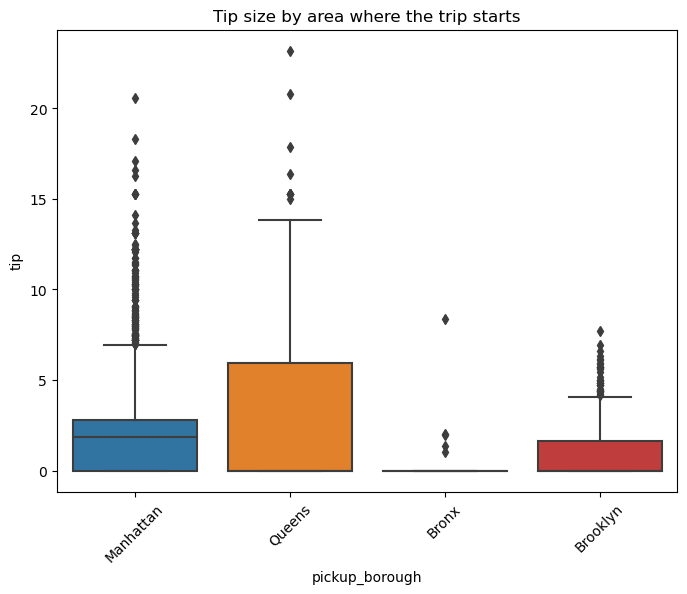

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_taxi_clean_2, x='pickup_borough', y='tip', )
plt.title('Tip size by area where the trip starts')
plt.xticks(rotation=45)
plt.show()

Один з можливих результатів (побудовано з seaborn):

15. Let's analyze which borough has the highest number of trips.

In [50]:
pickup_borough_size = (df_taxi_clean.groupby('pickup_borough').size()) #згрупувала по районам і порахувала яка кількість цих поїздок
display (pickup_borough_size)

pickup_borough
Bronx          99
Brooklyn      383
Manhattan    5268
NA             26
Queens        656
dtype: int64

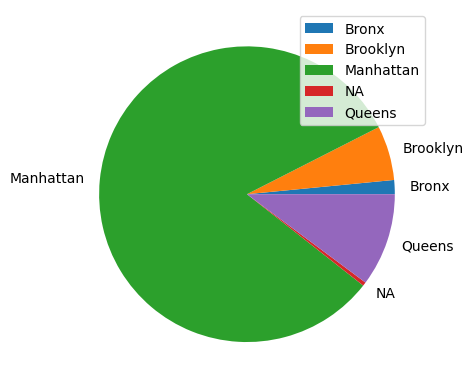

In [51]:
plt.pie(pickup_borough_size, labels = pickup_borough_size.index) # побудувала візуалізацію на основі попередніх даних
plt.legend()
plt.show()

 The most trips are made from the Manhattan borough. In this case, we need to ensure that there are enough vehicles available in this borough to accommodate the demand for trips. Additionally, we should strive to keep the waiting time for our customers' vehicles from being excessively long.

16.Is there a correlation between trips on toll roads and the tip amount?

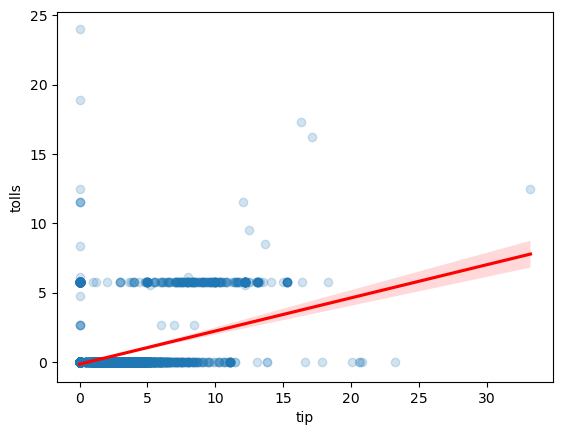

In [52]:
sns.regplot(x='tip', y='tolls', data=df_taxi_clean, scatter_kws={'alpha': 0.2}, line_kws={"color": "red"})
plt.show()

We see that customers leave tips even when drivers use toll roads. This opens up possibilities for service improvement. Perhaps it's worth developing fast and convenient payment methods for toll roads to increase customer satisfaction. Alternatively, this can be used as an advantage for the company when hiring drivers.

17. By which payment method do customers leave the most tips?

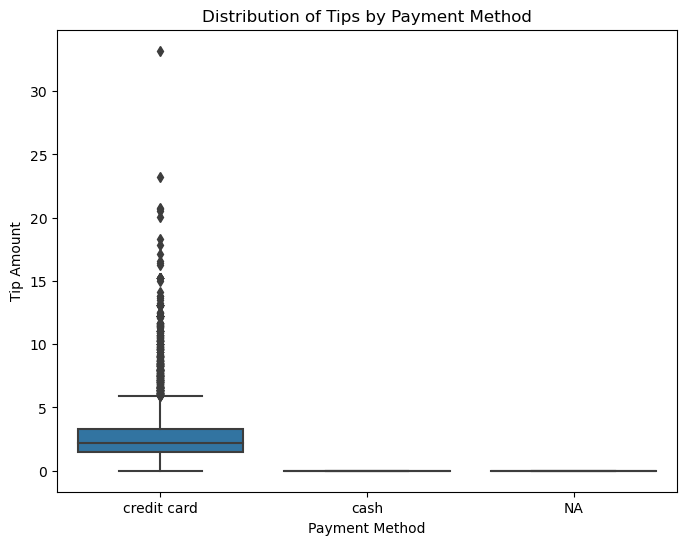

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_taxi_clean, x='payment', y='tip', )
plt.title('Distribution of Tips by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Tip Amount')
plt.show()

We see that tips are only left when paying by card. However, we understand that customers may also leave tips when paying with cash. We can conclude that the data is likely missing because we do not have the ability to collect complete data on cash payments, or they are not needed for analysis. In such a situation, if we understand that the missing data will be important for making business decisions, one of the conclusions and recommendations to the client would be to add options for collecting missing data to the application. In the future, we could have more complete data for analysis and could see a more detailed picture of what is happening in the company. In the case of taxi, these data are not critically important to collect.